# Image Classification

## Download CIFAR-10 Dataset 
Dataset Info:
[https://www.cs.toronto.edu/~kriz/cifar.html](https://www.cs.toronto.edu/~kriz/cifar.html)

In [3]:
! datasets/get_datasets.sh

--2017-07-14 12:12:16--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu... 128.100.3.30
Connecting to www.cs.toronto.edu|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  1.27MB/s    in 1m 52s  

2017-07-14 12:14:08 (1.45 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

x cifar-10-batches-py/
x cifar-10-batches-py/data_batch_4
x cifar-10-batches-py/readme.html
x cifar-10-batches-py/test_batch
x cifar-10-batches-py/data_batch_3
x cifar-10-batches-py/batches.meta
x cifar-10-batches-py/data_batch_2
x cifar-10-batches-py/data_batch_5
x cifar-10-batches-py/data_batch_1


## Load Data


In [3]:
from scripts.data_utils import load_CIFAR10

In [4]:
X_train, y_train, X_test, y_test, label_names = load_CIFAR10(train_percent=0.2, test_percent=0.2)

In [4]:
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)
print ('Label names :', ','.join(label_names))

Training data shape:  (10000, 32, 32, 3)
Training labels shape:  (10000,)
Test data shape:  (2000, 32, 32, 3)
Test labels shape:  (2000,)
Label names : airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck


## Visualize Data

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (15.0, 15.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

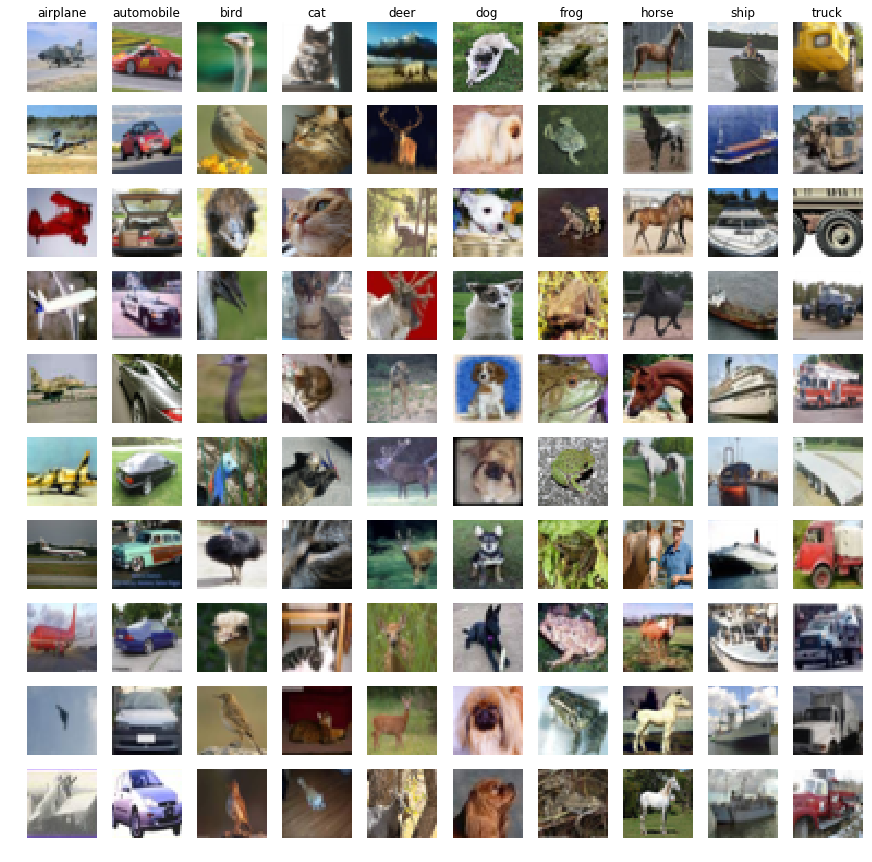

In [6]:
num_classes = len(label_names)
samples_per_class = 10
for y, cls in enumerate(label_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## K Nearest Neighbors (KNN)
More Info:
[http://scikit-learn.org/stable/modules/neighbors.html#](http://scikit-learn.org/stable/modules/neighbors.html#)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib

In [8]:
from sklearn import neighbors

In [9]:
X_train.shape

(10000, 32, 32, 3)

In [9]:
%%time
parameters = [{'weights': ['uniform', 'distance'], 'n_neighbors': [5, 10]}]
clf = GridSearchCV(neighbors.KNeighborsClassifier(), parameters, n_jobs=12, verbose=2)
clf.fit(X_train.reshape(X_train.shape[0], 32*32*3), y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] n_neighbors=5, weights=uniform ..................................
[CV] n_neighbors=5, weights=uniform ..................................
[CV] n_neighbors=5, weights=uniform ..................................
[CV] n_neighbors=5, weights=distance .................................
[CV] n_neighbors=5, weights=distance .................................
[CV] n_neighbors=5, weights=distance .................................
[CV] n_neighbors=10, weights=uniform .................................
[CV] n_neighbors=10, weights=uniform .................................
[CV] n_neighbors=10, weights=uniform .................................
[CV] n_neighbors=10, weights=distance ................................
[CV] n_neighbors=10, weights=distance ................................
[CV] n_neighbors=10, weights=distance ................................
[CV] ................... n_neighbors=5, weights=uniform, total=55.0min
[CV] ............

[Parallel(n_jobs=12)]: Done   3 out of  12 | elapsed: 165.3min remaining: 496.0min


[CV] .................. n_neighbors=5, weights=distance, total=55.1min
[CV] .................. n_neighbors=5, weights=distance, total=55.2min
[CV] .................. n_neighbors=10, weights=uniform, total=55.4min
[CV] .................. n_neighbors=10, weights=uniform, total=55.3min
[CV] ................... n_neighbors=5, weights=uniform, total=55.2min
[CV] .................. n_neighbors=10, weights=uniform, total=55.4min
[CV] ................. n_neighbors=10, weights=distance, total=55.4min


[Parallel(n_jobs=12)]: Done  10 out of  12 | elapsed: 166.5min remaining: 33.3min


[CV] ................. n_neighbors=10, weights=distance, total=55.7min
[CV] ................. n_neighbors=10, weights=distance, total=55.9min


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed: 167.1min finished


CPU times: user 47.3 s, sys: 3.42 s, total: 50.7 s
Wall time: 2h 47min 21s


In [10]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=8)
clf.fit(X_train.reshape(X_train.shape[0], 32*32*3), y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=8, n_neighbors=5, p=2,
           weights='distance')

In [11]:
# save the knn model
joblib.dump(clf, 'models/knn.pkl')

['models/knn_full.pkl']

In [8]:
# load the knn model
clf = joblib.load('models/knn.pkl')

In [12]:
print (clf.best_params_)

{'n_neighbors': 5, 'weights': 'distance'}


In [11]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test.reshape(X_test.shape[0], 32*32*3))
print ("Accuracy Score: ", accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred, target_names=label_names))

Accuracy Score:  0.299
             precision    recall  f1-score   support

   airplane       0.38      0.43      0.40       196
 automobile       0.74      0.14      0.24       198
       bird       0.19      0.34      0.24       195
        cat       0.23      0.14      0.17       199
       deer       0.19      0.47      0.27       198
        dog       0.29      0.14      0.19       185
       frog       0.29      0.28      0.28       216
      horse       0.55      0.19      0.28       193
       ship       0.40      0.67      0.50       217
      truck       0.59      0.16      0.25       203

avg / total       0.38      0.30      0.28      2000

CPU times: user 2min 7s, sys: 76 ms, total: 2min 8s
Wall time: 16.6 s


## Support Vector Machines (SVM)
More Info:
[http://scikit-learn.org/stable/modules/svm.html#](http://scikit-learn.org/stable/modules/svm.html#)

In [98]:
from sklearn.svm import SVC

In [ ]:
%%time
param_grid = {'C': [1e3, 1e4, 1e5],
              'gamma': [0.0001, 0.001, 0.01, 0.1]}
clf = GridSearchCV(SVC(kernel='linear', class_weight='balanced'), param_grid, n_jobs=4, verbose=2)
clf.fit(X_train.reshape(X_train.shape[0], 32*32*3), y_train)

In [14]:
%%time
clf = SVC(C=1000.0, kernel='linear', gamma=0.0001, class_weight='balanced', random_state=4242, verbose=True)
clf.fit(X_train.reshape(X_train.shape[0], 32*32*3), y_train)

[LibSVM]CPU times: user 9min 57s, sys: 168 ms, total: 9min 58s
Wall time: 9min 58s


In [15]:
# save the svm model
joblib.dump(clf, 'models/svm.pkl')

['models/svm.pkl']

In [18]:
print (clf.best_params_)

{'C': 1000.0, 'gamma': 0.0001}


In [16]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test.reshape(X_test.shape[0], 32*32*3))
print ("Accuracy Score: ", accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred, target_names=label_names))

Accuracy Score:  0.304
             precision    recall  f1-score   support

   airplane       0.26      0.34      0.29       196
 automobile       0.37      0.42      0.39       198
       bird       0.16      0.20      0.18       195
        cat       0.20      0.20      0.20       199
       deer       0.24      0.25      0.24       198
        dog       0.24      0.23      0.24       185
       frog       0.40      0.33      0.36       216
      horse       0.38      0.31      0.34       193
       ship       0.45      0.47      0.46       217
      truck       0.40      0.26      0.32       203

avg / total       0.31      0.30      0.31      2000

CPU times: user 1min 8s, sys: 8 ms, total: 1min 8s
Wall time: 1min 8s


## Logistic Regression
More Info:
[http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [1]:
from sklearn.linear_model import LogisticRegression

In [5]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', n_jobs=8, verbose=2, random_state=4242, max_iter=1000)
clf.fit(X_train.reshape(X_train.shape[0], 32*32*3), y_train)

/home/alper/anaconda2/envs/python3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:717: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=8)]: Done   1 out of   1 | elapsed:  5.5min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='multinomial',
          n_jobs=8, penalty='l2', random_state=4242, solver='lbfgs',
          tol=0.0001, verbose=2, warm_start=False)

In [8]:
# save the logistic regression model
joblib.dump(clf, 'models/lg.pkl')

['models/lg.pkl']

In [9]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test.reshape(X_test.shape[0], 32*32*3))
print ("Accuracy Score: ", accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred, target_names=label_names))

Accuracy Score:  0.283
             precision    recall  f1-score   support

   airplane       0.23      0.24      0.23       196
 automobile       0.33      0.32      0.32       198
       bird       0.17      0.14      0.15       195
        cat       0.21      0.19      0.20       199
       deer       0.24      0.24      0.24       198
        dog       0.25      0.28      0.26       185
       frog       0.34      0.37      0.35       216
      horse       0.29      0.30      0.29       193
       ship       0.38      0.43      0.40       217
      truck       0.34      0.31      0.32       203

avg / total       0.28      0.28      0.28      2000

CPU times: user 32 ms, sys: 8 ms, total: 40 ms
Wall time: 41.9 ms


## Neural Networks
More Info:
[https://keras.io/getting-started/sequential-model-guide/](https://keras.io/getting-started/sequential-model-guide/)

In [21]:
from keras.models import Sequential
from keras import regularizers
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

In [22]:
# simple model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(256, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation('softmax'))

In [23]:
print (model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               786688    
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
_________________________________________________________________
batch_normalization_4 (Batch (None, 10)                40        
__________

In [27]:
batch_size = 16
earlyStop = EarlyStopping(patience=5)
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=4242)

In [29]:
model.fit(X_tr, y_tr,
          epochs=100,
          batch_size=batch_size,
          validation_data=(X_val, y_val),
          callbacks=[earlyStop],
          verbose=1)

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 5s - loss: 2.2285 - acc: 0.3063 - val_loss: 2.0970 - val_acc: 0.3655

In [32]:
y_pred = model.predict_classes(X_test)

1856/2000 [==========================>...] - ETA: 0s

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print ("Accuracy Score: ", accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred, target_names=label_names))

Accuracy Score:  0.3515
             precision    recall  f1-score   support

   airplane       0.24      0.78      0.37       196
 automobile       0.75      0.31      0.44       198
       bird       0.42      0.11      0.17       195
        cat       0.22      0.24      0.23       199
       deer       0.37      0.17      0.23       198
        dog       0.27      0.44      0.34       185
       frog       0.51      0.39      0.44       216
      horse       0.56      0.28      0.37       193
       ship       0.60      0.29      0.40       217
      truck       0.40      0.50      0.45       203

avg / total       0.44      0.35      0.35      2000



In [35]:
#save the simple nn model
model.save('models/simplenn.pkl')

## Transfer Learning
More Info:
[https://keras.io/applications/](https://keras.io/applications/)

In [74]:
from keras.applications import resnet50
from keras.preprocessing.image import array_to_img, img_to_array
model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [86]:
def extract_features(images, model, preprocessing_function, hw_tuple=(224,224)):
    features = []
    for image in images:
        img = array_to_img(image)
        img = img.resize(hw_tuple)
        m = img_to_array(img)
        t = np.expand_dims(m, axis=0)
        x = preprocessing_function(t)
        p = model.predict(x)
        features.extend(p)
    return features

In [ ]:
# train features
features = extract_features(X_train, model, resnet50.preprocess_input)

In [88]:
features_train = np.array(features)
np.save('models/resnet50_train.features.npy', features_train)

In [91]:
# test features
features = extract_features(X_test, model, resnet50.preprocess_input)

In [92]:
features_test = np.array(features)
np.save('models/resnet50_test.features.npy', features_test)

In [95]:
# shape of the features
print (features_train.shape)
print (features_test.shape)
features_train = np.reshape(features_train, (10000, 2048))
features_test = np.reshape(features_test, (2000, 2048))

(10000, 1, 1, 2048)
(2000, 1, 1, 2048)


In [99]:
%%time
param_grid = {'C': [1e3, 1e4, 1e5],
              'gamma': [0.0001, 0.001, 0.01, 0.1],
              'kernel': ['linear', 'rbf']}
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, n_jobs=36, verbose=2)
clf.fit(features_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] C=1000.0, gamma=0.0001, kernel=linear ...........................
[CV] C=1000.0, gamma=0.0001, kernel=linear ...........................
[CV] C=1000.0, gamma=0.0001, kernel=linear ...........................
[CV] C=1000.0, gamma=0.0001, kernel=rbf ..............................
[CV] C=1000.0, gamma=0.0001, kernel=rbf ..............................
[CV] C=1000.0, gamma=0.0001, kernel=rbf ..............................
[CV] C=1000.0, gamma=0.001, kernel=linear ............................
[CV] C=1000.0, gamma=0.001, kernel=linear ............................
[CV] C=1000.0, gamma=0.001, kernel=linear ............................
[CV] C=1000.0, gamma=0.001, kernel=rbf ...............................
[CV] C=1000.0, gamma=0.001, kernel=rbf ...............................
[CV] C=1000.0, gamma=0.001, kernel=rbf ...............................
[CV] C=1000.0, gamma=0.01, kernel=linear .............................
[CV] C=1000.0, g

[Parallel(n_jobs=36)]: Done  38 out of  72 | elapsed:  9.4min remaining:  8.4min


[CV] ................. C=1000.0, gamma=0.01, kernel=rbf, total= 6.8min
[CV] ............ C=100000.0, gamma=0.01, kernel=linear, total= 1.8min
[CV] ............. C=100000.0, gamma=0.0001, kernel=rbf, total= 2.0min
[CV] ............. C=100000.0, gamma=0.0001, kernel=rbf, total= 2.2min
[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total= 7.1min
[CV] .............. C=10000.0, gamma=0.1, kernel=linear, total= 2.9min
[CV] .............. C=10000.0, gamma=0.1, kernel=linear, total= 3.3min
[CV] .......... C=100000.0, gamma=0.0001, kernel=linear, total= 3.4min
[CV] ............ C=100000.0, gamma=0.01, kernel=linear, total= 3.5min
[CV] ........... C=100000.0, gamma=0.001, kernel=linear, total= 3.4min
[CV] ............ C=100000.0, gamma=0.01, kernel=linear, total= 3.5min
[CV] ........... C=100000.0, gamma=0.001, kernel=linear, total= 3.4min
[CV] ............. C=100000.0, gamma=0.0001, kernel=rbf, total= 3.7min
[CV] ............. C=100000.0, gamma=0.1, kernel=linear, total= 1.7min
[CV] .

[Parallel(n_jobs=36)]: Done  72 out of  72 | elapsed: 17.3min finished


CPU times: user 2min 30s, sys: 3.24 s, total: 2min 33s
Wall time: 19min 34s


In [100]:
## save svm model trained on extracted features
joblib.dump(clf, 'models/svm_transfer.pkl')

['models/svm_transfer.pkl']

In [101]:
clf.best_params_

{'C': 1000.0, 'gamma': 0.001, 'kernel': 'rbf'}

In [102]:
clf.best_score_

0.79349999999999998

In [103]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
y_pred = clf.predict(features_test)
print ("Accuracy Score: ", accuracy_score(y_test, y_pred))
print (classification_report(y_test, y_pred, target_names=label_names))

Accuracy Score:  0.7995
             precision    recall  f1-score   support

   airplane       0.72      0.83      0.77       196
 automobile       0.87      0.89      0.88       198
       bird       0.76      0.72      0.74       195
        cat       0.66      0.68      0.67       199
       deer       0.78      0.78      0.78       198
        dog       0.77      0.73      0.75       185
       frog       0.83      0.83      0.83       216
      horse       0.86      0.82      0.84       193
       ship       0.87      0.85      0.86       217
      truck       0.88      0.86      0.87       203

avg / total       0.80      0.80      0.80      2000

CPU times: user 38.8 s, sys: 0 ns, total: 38.8 s
Wall time: 38.8 s
